In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
df = pd.read_csv("iris.csv")

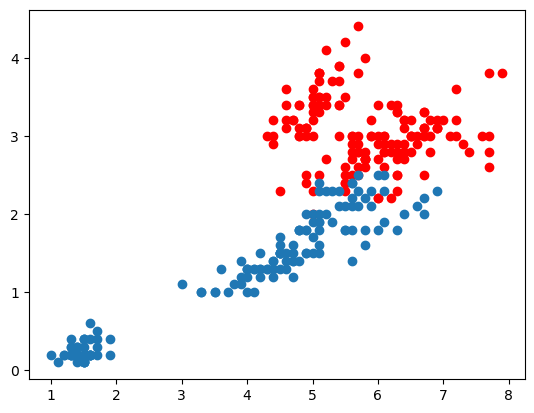

In [6]:
plt.scatter(df.SepalLengthCm, df.SepalWidthCm, color ='red')
plt.scatter(df.PetalLengthCm, df.PetalWidthCm)

In [7]:
df.value_counts

<bound method DataFrame.value_counts of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       I

In [8]:
df.Species.nunique()

3

In [23]:
import numpy as np
import random

class MySoftmaxRegression:
    def __init__(self, alfa=0.1, iterations=5000, normalize=True):
        self.alfa = alfa
        self.iterations = iterations
        self.normalize = normalize

        self.coef_ = []
        self.weights = []
        self.bias_ = []
        self.cost_function_history = []

    def softmax(self, Z):
        Z_exp = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return Z_exp / np.sum(Z_exp, axis=1, keepdims=True)

    def one_hot(self, y, classes):
        out = np.zeros((len(y), classes))
        for i in range(len(y)):
            out[i, y[i]] = 1
        return out

    def costFunction(self, Y_hat, Y):
        Y_hat = np.clip(Y_hat, 1e-10, 1)
        return -np.mean(np.sum(Y * np.log(Y_hat), axis=1))

    def normalize_data(self, X):
        return (X - X.mean(axis=0)) / X.std(axis=0)

    def fit(self, X, y):
        if self.normalize:
            X = self.normalize_data(X)

        m, n = X.shape
        classes = len(np.unique(y))

        Y = self.one_hot(y, classes)

        X_ = np.c_[np.ones(m), X]
        w = np.array([[random.random() for _ in range(classes)] for _ in range(n+1)], float)

        for i in range(self.iterations):
            Z = np.dot(X_, w)
            Y_hat = self.softmax(Z)

            cost_val = self.costFunction(Y_hat, Y)
            self.cost_function_history.append(cost_val)

            gradient = np.dot(X_.T, (Y_hat - Y)) / m
            w = w - self.alfa * gradient

        self.weights = w.copy()
        self.bias_ = w[0]
        self.coef_ = w[1:]

    def predict_proba(self, X):
        if self.normalize:
            X = self.normalize_data(X)
        X_ = np.c_[np.ones(X.shape[0]), X]
        Z = np.dot(X_, self.weights)
        return self.softmax(Z)

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)


In [24]:
label_map = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

df["Species"] = df["Species"].map(label_map)

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

idx = np.random.permutation(len(X))
train_size = int(len(X) * 0.8)

train_idx = idx[:train_size]
test_idx = idx[train_size:]

X_train = X[train_idx]
y_train = y[train_idx]

X_test = X[test_idx]
y_test = y[test_idx]

model = MySoftmaxRegression(alfa=0.1, iterations=4000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = np.mean(predictions == y_test)

print("Accuracy:", accuracy)

plt.plot(model.cost_history)
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [26]:
df.value_counts

<bound method DataFrame.value_counts of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2      NaN
1      2            4.9           3.0            1.4           0.2      NaN
2      3            4.7           3.2            1.3           0.2      NaN
3      4            4.6           3.1            1.5           0.2      NaN
4      5            5.0           3.6            1.4           0.2      NaN
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3      NaN
146  147            6.3           2.5            5.0           1.9      NaN
147  148            6.5           3.0            5.2           2.0      NaN
148  149            6.2           3.4            5.4           2.3      NaN
149  150            5.9           3.0            5.1           1.8      NaN

[150 rows x 6 columns]>